In [4]:
# Import libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code from udacity nanodegree.
import visuals as vs

%matplotlib inline

# Load the dataset
data =np.array(pd.read_csv('housing.csv'))
prices = data[:,3]
features = data[:,0:3]
    
# Success
print(f"Boston housing dataset has {data.shape[0]} data points with {data.shape[1]} variables each.")

Boston housing dataset has 489 data points with 4 variables each.


### Data Exploration 

In [5]:
minimum_price = np.min(prices)

maximum_price = np.max(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

std_price = np.std(prices)

# Show the calculated statistics
print(f"Statistics for Boston housing dataset:\n")
print(f"Minimum price: ${minimum_price}") 
print(f"Maximum price: ${maximum_price}")
print(f"Mean price: ${mean_price}")
print(f"Median price ${median_price}")
print(f"Standard deviation of prices: ${std_price}")

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Developing a Model 

In [6]:
# build r2 score function.
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true,y_predict)
    
    return score

In [7]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(features,prices,test_size=0.2,random_state=42,)
print("Training and testing split was successful.")

Training and testing split was successful.


F:\anaconda\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
F:\anaconda\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
F:\anaconda\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
F:\anaconda\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
F:\anaconda\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
F:\anaconda\lib\site-packages\sklea

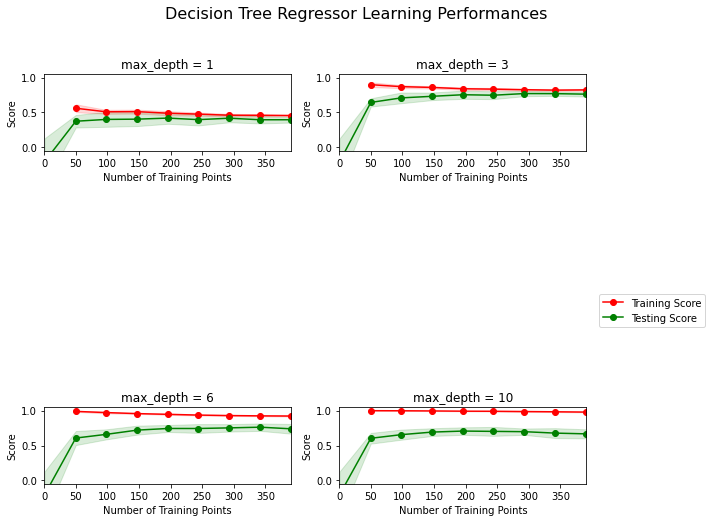

In [8]:
#draw learning curve by using th visuals library (Decision tree estimator)
vs.ModelLearning(features, prices) #we get from the learning curve that estimator (Decision tree,max_depth=3,4) is best model for the data   

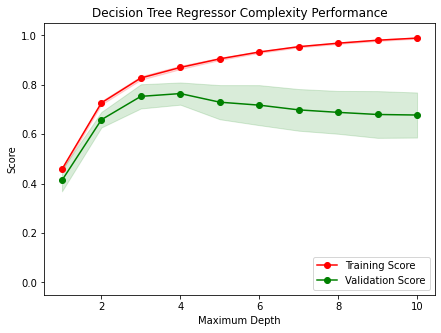

In [9]:
#draw complexity graph to know best parameters for estimatoe(Decision tree regressor)
vs.ModelComplexity(X_train, y_train)  #max depth 4 is the best one

In [15]:
#Bulid Function to fit model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    regressor = DecisionTreeRegressor()
    params = {'max_depth':range(1,11)}
    score =make_scorer(performance_metric)
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid =GridSearchCV(estimator=regressor,param_grid=params,scoring=score,cv=cv_sets)
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    # Return the optimal model after fitting the data
    return grid.best_estimator_


In [16]:
# Fit the training data to the model using grid search.
reg = fit_model(X_train, y_train)
#print best max depth for decision tree.
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [18]:
#Predict a data from clients.
# Produce a matrix for client data.
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36
